<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Сборный проект

## Содержание

## Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Цель проекта:

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

## Описание данных

Каждая запись в логе — это действие пользователя, или событие.
* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Загрузка и предобработка данных

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import warnings
warnings.filterwarnings('ignore')

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ты подгрузил все необходимые быблиотеки. Для загрузки данных как с локальной машины, так и из сети можно использовать try-except.
    
Также полезно задать параметры отображения таблиц
    
    pd.set_option('display.max_colwidth', None) # - текст в ячейке отражался полностью вне зависимости от длины. В данном случае мы можем быть уверены, что события и идентификаторы полностью будут видны, точно ничего не обрежется. А в целом это используется для отображения полностью каких-то описательных категорий, например, если полностью описан метод исследования или проверки гипотез, чтоб можно было все полностью прочитать.
    pd.set_option('display.float_format', '{:.2f}'.format) # -  все числа отражались с двумя знаками после запятой. Так не нужно будет для каждой таблицы и/или столбца задавать формат. Можно выбрать удобный для себя (1, 2 знака или вообще в целом виде)
    
Еще фишки по настройки таблиц можно посмотреть здесь https://habr.com/ru/post/521894/
    
</div>

In [83]:
df = pd.read_csv()
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [85]:
# переименновываю столбцы
df.columns = ['event', 'id', 'time', 'group']

In [86]:
df

,event,id,time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [87]:
# смотрю дубликаты
df.drop_duplicates().reset_index()

,index,event,id,time,group
0,0,MainScreenAppear,4575588528974610257,1564029816,246
1,1,MainScreenAppear,7416695313311560658,1564053102,246
2,2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,3,CartScreenAppear,3518123091307005509,1564054127,248
4,4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...,...
243708,244121,MainScreenAppear,4599628364049201812,1565212345,247
243709,244122,MainScreenAppear,5849806612437486590,1565212439,246
243710,244123,MainScreenAppear,5746969938801999050,1565212483,246
243711,244124,MainScreenAppear,5746969938801999050,1565212498,246


Так как дубликатов относительно немного, я из удаляю 

In [88]:
# смотрю пропуски
df.isna().sum()

event    0
id       0
time     0
group    0
dtype: int64

In [89]:
# добавляю столбец даты и времени и столбец с датой
df['time'] = pd.to_datetime(df['time'], unit='s')
df['date'] =df['time'].dt.date
df

,event,id,time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
event    244126 non-null object
id       244126 non-null int64
time     244126 non-null datetime64[ns]
group    244126 non-null int64
date     244126 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


In [91]:
# заменяю номера групп на буквенные значения, так как я начинаю путаться
df.loc[df['group'] == 246, 'group'] = 'A'

In [92]:
df.loc[df['group'] == 247, 'group'] = 'A2'

In [93]:
df.loc[df['group'] == 248, 'group'] = 'B'

In [94]:
df

,event,id,time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A,2019-08-07


In [95]:
# проверяю не попал ли сразу в несколько групп кто-то из пользователей
test_1=df.groupby('id')['group'].nunique().reset_index()
test_1

,id,group
0,6888746892508752,1
1,6909561520679493,1
2,6922444491712477,1
3,7435777799948366,1
4,7702139951469979,1
...,...,...
7546,9217594193087726423,1
7547,9219463515465815368,1
7548,9220879493065341500,1
7549,9221926045299980007,1


In [96]:
test_1.query('group > 1').count()


id       0
group    0
dtype: int64

In [97]:
df = df[['event', 'id', 'group', 'date', 'time']]

In [98]:
df

,event,id,group,date,time
0,MainScreenAppear,4575588528974610257,A,2019-07-25,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,A,2019-07-25,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,B,2019-07-25,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,B,2019-07-25,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,B,2019-07-25,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,A2,2019-08-07,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,A,2019-08-07,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,A,2019-08-07,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,A,2019-08-07,2019-08-07 21:14:58


В первой части проекта я:
* изменил названия столбцов на удобные
* добавил столбцы с датой и временем 
* сделал удобным названия групп
* удалил незначительное количество дубликатов
* проверил не попал ли кто-то из пользователей сразу в несколько групп

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, ты все отлично преобразовал, молодец. Данные готовы к анализу.
    
</div>

## Изучение и проверка данных

### Сколько всего событий в логе?

In [99]:
print('Всего в логе',df['event'].count(), 'событий')

Всего в логе 244126 событий


In [100]:
events = df.groupby('event')['date'].count().sort_values(ascending=False).reset_index()
events

,event,date
0,MainScreenAppear,119205
1,OffersScreenAppear,46825
2,CartScreenAppear,42731
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, хотя здесь скорее имелось ввиду сколько типов событий у нас есть. Из таблицы видно, что у нас 5 различных типов, стоило описать что это за события.
    
</div>

Всего у нас пять видов событий:
* MainScreenAppear - заход на главный экран
* OffersScreenAppear - заход на страницу с заказами
* CartScreenAppear - заход в корзину 
* PaymentScreenSuccessful - заход на страницу оплаты
* Tutorial - заход на страницу обучения

### Сколько всего пользователей в логе?

In [101]:
print('Всего в логе',df['id'].nunique(), 'пользователей')

Всего в логе 7551 пользователей


In [102]:
users = df.groupby('group')['id'].nunique().sort_values(ascending=False).reset_index()
users

,group,id
0,B,2542
1,A2,2520
2,A,2489


### Сколько в среднем событий приходится на пользователя?

In [103]:
print('В среднем на пользователя приходится', (df['event'].count()/df['id'].nunique()).round(0),'события')

В среднем на пользователя приходится 32.0 события


### Данными за какой период времени вы располагаете на самом деле?

In [104]:
print(df['time'].max()-df['time'].min())

13 days 16:31:41


Всего у нас есть данные почти за две недели.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Чтоб в итоговом варианте проекта не всплывали ненужные предупреждения, можно в начале натроить

    warnings.filterwarnings('ignore')
    
</div>


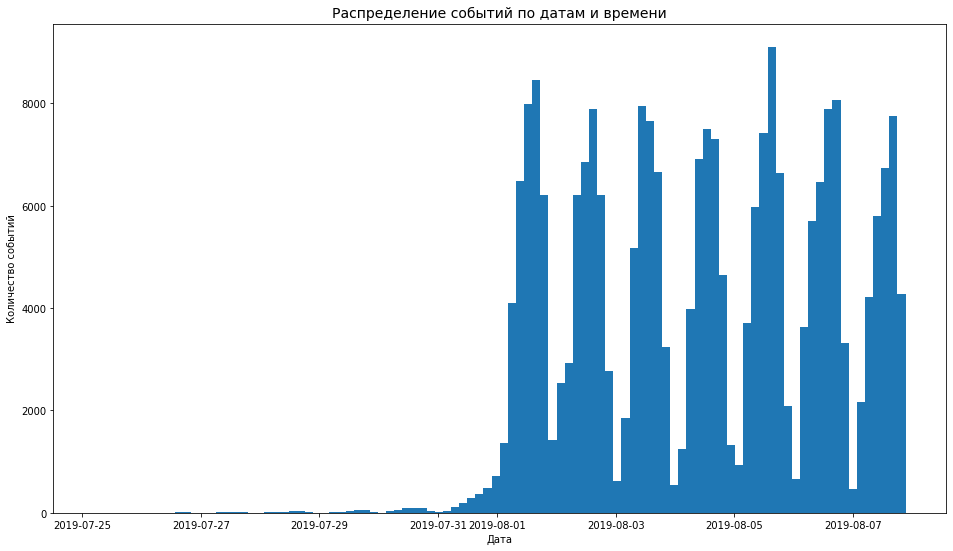

In [105]:
# смотрю распределение событий по дате
plt.figure(figsize=(16, 9))
plt.title('Распределение событий по датам и времени', fontsize=14)
plt.hist('time', data=df, bins=100)
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Количество событий', fontsize=10)
plt.show()

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

На графиве четко видна периодичность. Это не нельзя оставлять безвнимания, такие моменты надо комментировать.
    
</div>

На графике видно, что событий до первого августа нет.

In [106]:
# я создаю новый датафрейм, где не будет событий до первого числа.
df_new = df.query('time >= "2019-08-01"')

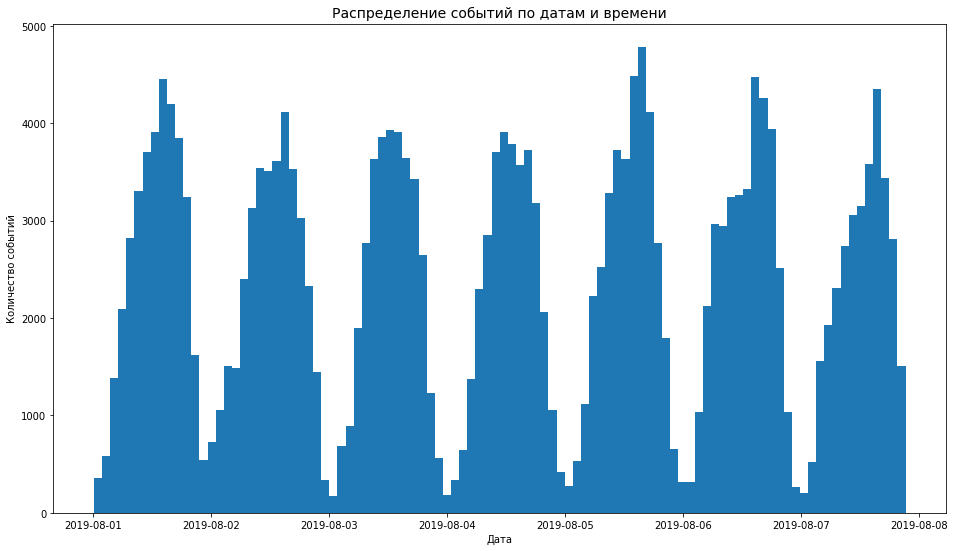

In [107]:
# смотрю распределение событий по дате
plt.figure(figsize=(16, 9))
plt.title('Распределение событий по датам и времени', fontsize=14)
plt.hist('time', data=df_new, bins=100)
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Количество событий', fontsize=10)
plt.show()

In [108]:
print('На самом деле я расплагаю данными за период между',(df_new['time'].min(), 'и', df_new['time'].max()))

На самом деле я расплагаю данными за период между (Timestamp('2019-08-01 00:07:28'), 'и', Timestamp('2019-08-07 21:15:17'))


Так же можно добавить, что у данных есть чёткая периодичность. Активность постепенно растёт полдня и потом так же постепенно падает.

In [109]:
df_new

,event,id,group,date,time
2828,Tutorial,3737462046622621720,A,2019-08-01,2019-08-01 00:07:28
2829,MainScreenAppear,3737462046622621720,A,2019-08-01,2019-08-01 00:08:00
2830,MainScreenAppear,3737462046622621720,A,2019-08-01,2019-08-01 00:08:55
2831,OffersScreenAppear,3737462046622621720,A,2019-08-01,2019-08-01 00:08:58
2832,MainScreenAppear,1433840883824088890,A2,2019-08-01,2019-08-01 00:08:59
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,A2,2019-08-07,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,A,2019-08-07,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,A,2019-08-07,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,A,2019-08-07,2019-08-07 21:14:58


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, в этой части все верно рассчитано.
    
</div>

### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [110]:
test3 = ((df['event'].count() - df_new['event'].count())/df['event'].count()*100).round(2)

In [111]:
print('Из-за отброса старых данных я потерял только', test3,'% данных')

Из-за отброса старых данных я потерял только 1.16 % данных


За счёт такой фильтрации отбросилось незначительное количество данных.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, молодец, что рассчитал именно процент, он нагляднее, чем абсолютное значение.
    
</div>

### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [112]:
users = df_new.groupby('group')['id'].nunique().sort_values(ascending=False).reset_index()
users

,group,id
0,B,2537
1,A2,2513
2,A,2484


В новом дата фрейме представлены все три группы

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, но здесь также важно отметить, что группы равнозначны, это важно для статистического анализа.
    
</div>

## Изучение воронки событий

### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [113]:
events = df_new.groupby('event')['id'].count().sort_values(ascending=False).reset_index()
events

,event,id
0,MainScreenAppear,117431
1,OffersScreenAppear,46350
2,CartScreenAppear,42365
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [114]:
users_count = df_new['id'].nunique()

In [115]:
users_count

7534

In [116]:
# смотрю сколько польователей совершили каждое действие
events = df_new.groupby('event').agg({'id':'nunique'}).sort_values('id', ascending=False).reset_index()

In [117]:
events

,event,id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [118]:
# смотрю сколько польователей совершили каждое действие в процентах
events['part'] = ((events['id'] / users_count) * 100).round(1)

In [119]:
events

,event,id,part
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.1


Исходя из этих данных, можно предположить, что сначала пользователи заходят на главный экран, затем смотрят на страницу с предложениями, далее заходят в корзину, потом на страницу оплаты. Не логичным кажется тут страница с туторилом, на которую заходит лишь каждый 10 пользователь. Ведь сначала нужно узнать, как всё устроено. Хотя, наверное, десять процентов это много. Ведь должно быть интуитивно понятно, куда нажимать и как платить. Но одинадцати процентам пользователей с этим сложно.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, все верно рассчитано. Также ты правильно заметил про tutorial. Также стоит отметить, что у нас не все пользователи идут через главную страницу, некоторые попадают каким-то другим способом
    
</div>

### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).

In [120]:
# так как туториал не вписывается в эту воронку я его убираю 
events = events.drop(events.tail(1).index)

In [121]:
events 

,event,id,part
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0


In [122]:
events = events.loc[:3]
for i in range(1, 4):
    events.loc[i, 'percent'] = (events.loc[i, 'id'] / events.loc[i-1, 'id'] * 100).round(1)
events

,event,id,part,percent
0,MainScreenAppear,7419,98.5,NaN
1,OffersScreenAppear,4593,61.0,61.9
2,CartScreenAppear,3734,49.6,81.3
3,PaymentScreenSuccessful,3539,47.0,94.8


In [124]:

import plotly.express as px
from plotly import graph_objects as go
fig = go.Figure(data=[go.Funnel(y=events['event'], x=events['id'], textinfo = "value +percent previous")])
fig.update_layout(title_text='Какай процент пользователей переходит на следующий шаг')
fig.show()


Можно сказать, что больше всего пользователей теряется с переходом от главной страницы к странице заказов(38%). Однако, при этом стоит отметить, что почти половина пользователей(47.0%) посетивших главную страницу, переходят на страницу оплаты. Я считаю, что это хороший показатель. Также видно, что почти все пользователей (94.8%) посетившие страницу с карзиной, завершили покупку. 

In [123]:
buy_percent = (events.loc[3, 'id'] / events.loc[0, 'id'] * 100).round(1)
buy_percent

47.7

А от первого шага до последнего доходит почти 48 процентов пользователей.

In [ ]:
Можно сказать, что 

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Воронака рассчитана правильно, ее надо визуализировать. В принципе достаточно и обычной столбчатой диаграммы. Но есть и специальный инструмент Funnel библиотеки plotly.
    
Также нудо более подробно описать полученные проценты. Потеря пользователей большая или допустимая? Каковы могут быть причины таких потерь? Как их уменьшить?
    
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, теперь все верно.
    
</div>

## Изучение результатов эксперимента

### Сколько пользователей в каждой экспериментальной группе?

In [68]:
groups = df_new.groupby('group')['id'].nunique().sort_values(ascending=True).reset_index()
groups

,group,id
0,A,2484
1,A2,2513
2,B,2537


<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь мало просто вывести количество пользователей в группе. Надо посмотреть насколько они отличаются (%). Также можно проверить гипотезу, посмотреть есть ли статистически значимая разница между группами
    
</div>

### Проверьте, находят ли статистические критерии разницу между выборками A и A2.


In [69]:
# нахожу частоту событий для каждой группы
events_by_groups = df_new.pivot_table(index = 'event', columns='group', values='id', aggfunc='nunique').reset_index().sort_values(by = 'A', ascending = False)
events_by_groups

group,event,A,A2,B
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
0,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


Формулирую две гипотезы: 
* Нулевая:  между группами есть статистичекая разница.
* Альтернативная: между группами нет статистической разницы.

In [70]:
def Ztest (group_1_MainScreen, group_2_MainScreen, 
           group_1_OffersScreen, group_2_OffersScreen,
           group_1_CartScreen, group_2_CartScreen,
           group_1_PaymentScreen, group_2_PaymentScreen,
           group_1_Tutorial, group_2_Tutorial,
           group_1_users, group_2_users):
    
    # критический уровень статистической значимости
    alpha = .05
    
    main = np.array([group_1_MainScreen, group_2_MainScreen])
    offer = np.array([group_1_OffersScreen, group_2_OffersScreen])
    basket = np.array([group_1_CartScreen, group_2_CartScreen])
    pay = np.array([group_1_PaymentScreen, group_2_PaymentScreen])
    tutorial = np.array([group_1_Tutorial, group_2_Tutorial])
    total_users = np.array([group_1_users, group_2_users])
    
    # расчитаваю процент успеха в каждой из групп
    p1_main = main[0]/total_users[0]
    p2_main = main[1]/total_users[1]
    
    p1_offer = offer[0]/total_users[0]
    p2_offer = offer[1]/total_users[1]
    
    p1_basket = basket[0]/total_users[0]
    p2_basket = basket[1]/total_users[1]
    
    p1_pay = pay[0]/total_users[0]
    p2_pay = pay[1]/total_users[1]
    
    p1_tutorial = tutorial[0]/total_users[0]
    p2_tutorial = tutorial[1]/total_users[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined_main = (main[0] + main[1]) / (total_users[0] + total_users[1])
    p_combined_offer = (offer[0] + offer[1]) / (total_users[0] + total_users[1])
    p_combined_basket = (basket[0] + basket[1]) / (total_users[0] + total_users[1])
    p_combined_pay = (pay[0] + pay[1]) / (total_users[0] + total_users[1])
    p_combined_tutorial = (tutorial[0] + tutorial[1]) / (total_users[0] + total_users[1])
    
    
    # расчитаваю разницу долей успеха в каждой из групп
    difference_main = p1_main - p2_main
    difference_offer = p1_offer - p2_offer
    difference_basket = p1_basket - p2_basket
    difference_pay = p1_pay - p2_pay
    difference_tutorial = p1_tutorial - p2_tutorial
    
    # считаю статистику в ст.отклонениях стандартного нормального распределения
    z_value_main = difference_main / mth.sqrt(p_combined_main * (1 - p_combined_main) * (1/total_users[0] + 1/total_users[1]))
    z_value_offer = difference_offer / mth.sqrt(p_combined_offer * (1 - p_combined_offer) * (1/total_users[0] + 1/total_users[1]))
    z_value_basket = difference_basket / mth.sqrt(p_combined_basket * (1 - p_combined_basket) * (1/total_users[0] + 1/total_users[1]))
    z_value_pay = difference_pay / mth.sqrt(p_combined_pay * (1 - p_combined_pay) * (1/total_users[0] + 1/total_users[1]))
    z_value_tutorial = difference_tutorial / mth.sqrt(p_combined_tutorial * (1 - p_combined_tutorial) * (1/total_users[0] + 1/total_users[1]))

    # задаю стандартное нормальное распределение (среднее 0, ст.отклонение 1)    
    distr = st.norm(0, 1)
    
    
    # рассчитываю p-value
    p_value_main = (1 - distr.cdf(abs(z_value_main))) * 2
    p_value_offer = (1 - distr.cdf(abs(z_value_offer))) * 2
    p_value_basket = (1 - distr.cdf(abs(z_value_basket))) * 2
    p_value_pay = (1 - distr.cdf(abs(z_value_pay))) * 2
    p_value_tutorial = (1 - distr.cdf(abs(z_value_tutorial))) * 2
    
    print('p-значение MainScreenAppear: ', p_value_main)
    if (p_value_main < alpha):
        print("Отвергаем нулевую гипотезу. Между группами есть статистическая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.")
              
              
    print('p-значение OffersScreenAppear: ', p_value_offer)
    if (p_value_offer < alpha):
        print("Отвергаем нулевую гипотезу. Между группами есть статистическая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.")
        
              
    print('p-значение CartScreenAppear: ', p_value_basket)
    if (p_value_basket < alpha):
        print("Отвергаем нулевую гипотезу. Между группами есть статистическая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.")
        
              
    print('p-значение PaymentScreenSuccessful: ', p_value_pay)
    if (p_value_pay < alpha):
        print("Отвергаем нулевую гипотезу. Между группами есть статистическая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.")
    
    print('p-значение Tutorial: ', p_value_tutorial)
    if (p_value_tutorial < alpha):
        print("Отвергаем нулевую гипотезу. Между группами есть статистическая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.")
    
        

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Математически все верно. Но вообще надо было написать компактную функцию для рассчета, а потом в цикле пройтись по всем событиям.
    
</div>

In [71]:

Ztest_A_A2 = Ztest(events_by_groups.loc[1, 'A'], events_by_groups.loc[1, 'A2'],
                          events_by_groups.loc[2, 'A'], events_by_groups.loc[2, 'A2'],
                          events_by_groups.loc[0, 'A'], events_by_groups.loc[0, 'A2'],
                          events_by_groups.loc[3, 'A'], events_by_groups.loc[3, 'A2'],
                          events_by_groups.loc[4, 'A'], events_by_groups.loc[4, 'A2'],
                          groups.loc[0, 'id'], groups.loc[1, 'id'])

p-значение MainScreenAppear:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение OffersScreenAppear:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение CartScreenAppear:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение PaymentScreenSuccessful:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение Tutorial:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.


### Можно ли сказать, что разбиение на группы работает корректно?

Так как нет статистической разницы ни по одному из действий пользователей между группами A и A2, то можно сказать, что разбитие на группы работает корректно.

### Проверка гипотез между группами A и B

In [72]:
Ztest_A_B = Ztest(events_by_groups.loc[1, 'A'], events_by_groups.loc[1, 'B'],
                          events_by_groups.loc[2, 'A'], events_by_groups.loc[2, 'B'],
                          events_by_groups.loc[0, 'A'], events_by_groups.loc[0, 'B'],
                          events_by_groups.loc[3, 'A'], events_by_groups.loc[3, 'B'],
                          events_by_groups.loc[4, 'A'], events_by_groups.loc[4, 'B'],
                          groups.loc[0, 'id'], groups.loc[2, 'id'])

p-значение MainScreenAppear:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение OffersScreenAppear:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение CartScreenAppear:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение PaymentScreenSuccessful:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение Tutorial:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.


### Проверка гипотез между группами A2 и B

In [73]:
Ztest_A2_B = Ztest(events_by_groups.loc[1, 'A2'], events_by_groups.loc[1, 'B'],
                          events_by_groups.loc[2, 'A2'], events_by_groups.loc[2, 'B'],
                          events_by_groups.loc[0, 'A2'], events_by_groups.loc[0, 'B'],
                          events_by_groups.loc[3, 'A2'], events_by_groups.loc[3, 'B'],
                          events_by_groups.loc[4, 'A2'], events_by_groups.loc[4, 'B'],
                          groups.loc[1, 'id'], groups.loc[2, 'id'])

p-значение MainScreenAppear:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение OffersScreenAppear:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение CartScreenAppear:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение PaymentScreenSuccessful:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение Tutorial:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.


### Проверка гипотез между группами объединёнными группами A и A2 и B

In [74]:
events_by_groups['A + A2'] = events_by_groups['A'] + events_by_groups['A2']

In [75]:
events_by_groups

group,event,A,A2,B,A + A2
1,MainScreenAppear,2450,2476,2493,4926
2,OffersScreenAppear,1542,1520,1531,3062
0,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,279,561


In [76]:
groups.loc[3] = 'A+A2', 2513+2484

In [77]:
groups

,group,id
0,A,2484
1,A2,2513
2,B,2537
3,A+A2,4997


In [78]:
Ztest_A_A2_B = Ztest(events_by_groups.loc[1, 'A + A2'], events_by_groups.loc[1, 'B'],
                          events_by_groups.loc[2, 'A + A2'], events_by_groups.loc[2, 'B'],
                          events_by_groups.loc[0, 'A + A2'], events_by_groups.loc[0, 'B'],
                          events_by_groups.loc[3, 'A + A2'], events_by_groups.loc[3, 'B'],
                          events_by_groups.loc[4, 'A + A2'], events_by_groups.loc[4, 'B'],
                          groups.loc[3, 'id'], groups.loc[2, 'id'])

p-значение MainScreenAppear:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение OffersScreenAppear:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение CartScreenAppear:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение PaymentScreenSuccessful:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.
p-значение Tutorial:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу. Между группами нет статистической разницы.


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Гипотезы проверены правильно.
    
</div>

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь немного больше внимания стоило уделить выбору уровня значимости. Проверку можно сделать и для уровня 0.05, но вот текстом стоило отметить, что было бы, если бы мы взяли уровень 0.1 или 0.01. Также стоило на словах обосновать выбор уровня на 0.05.
    
    
Также стоит обратить внимание, что здесь мы проводили множественную проверку гипотез, а это специфичная вещь. Обычно в таких случаях нужно делать поправки на уровне значимости.
    
Подробнее можно почитать здесь https://habr.com/ru/company/yandex/blog/476826/
    
</div>

## Вывод

Я провёл серию проверок гипотез с уровнем значимости 0,05. Я считаю такой критерий достаточным для поставленых целей. При таком уровне значимости ни на одном из действий пользователей, я не выявил разницы. Всего было проведено 4 вида проверки по каждом из 5 виду действий пользователей. Между группами A и A2, между A и B, между A2 и B и между объединённой тестовой группой и группой B.

Можно сделать вывод, что замена шрифта никак не сказалась на действиях пользователей. Однако, стоит заметить, что изначально у меня были данные за две недели, но так как данных за первую неделю было не достаточны, я делал тесты по данным только за одну неделю. Я считаю, что такого периода не достаточно и можно было бы повторить тест с данными за более длинный период

<div style="border:solid green 2px; padding: 20px"> 
    
**Общий комментарий по проекту**

Ты отлично поработал над проектом, данные верно проанализированы и гипотезы проверены правильно. . 
    
Итоговые выводы хорошо сделаны. Но обрати внимание, что по ходу проекта стоит отмечать более ценные для клиента моменты. Можно отмечать вопросы для дальнейших исследований, а также всегда очень ценятся конкретные рекомендации. 
    
Постратайся доработать по замечаниям. Удачи.
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Проект отлично доработан, молодец.
    
</div>